In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/pc/Desktop/New folder/DataAnalysisTerm/medical_examination.csv', index_col='id')

In [5]:
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


>>>Obesity Check

In [6]:
over_wieght = (df['weight'] / (df['height'] / 100)**2).astype(int)
df['overweight'] = (over_wieght > 25)
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,True
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,True
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,True


...Getting obesity number and percentage.

In [7]:
obe_num = df['overweight'].value_counts(True)
total = df['overweight'].value_counts()
print(obe_num, total)

True     0.531186
False    0.468814
Name: overweight, dtype: float64 True     37183
False    32817
Name: overweight, dtype: int64


### The percentage of obesity to the total is 53% and 46% for normal_weighted .

In [8]:
for value in df.groupby('overweight'):
    if value == True:
        value = 1
    else:
        value=0
    print(df['overweight'])


id
0        False
1         True
2        False
3         True
4        False
         ...  
99993     True
99995     True
99996     True
99998     True
99999    False
Name: overweight, Length: 70000, dtype: bool
id
0        False
1         True
2        False
3         True
4        False
         ...  
99993     True
99995     True
99996     True
99998     True
99999    False
Name: overweight, Length: 70000, dtype: bool


In [9]:
df['overweight'] = df['overweight'].replace({True:1, False:0})
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1


## Next step we will normalize the dataset by setting 0 as always bad and 1 value as always good .

In [10]:
df[['cholesterol', 'gluc']] = (df[['cholesterol', 'gluc']]>1).astype(int)
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1


In [ ]:
cat_plot = sns.catplot(data=df, x=)

In [11]:
df_cat = pd.melt(frame=df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [12]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


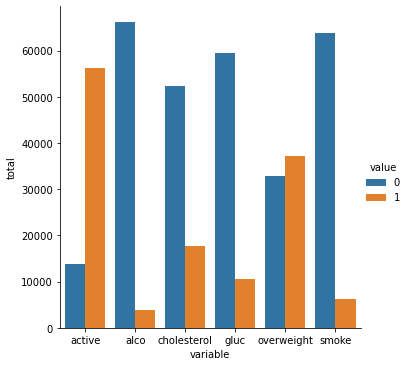

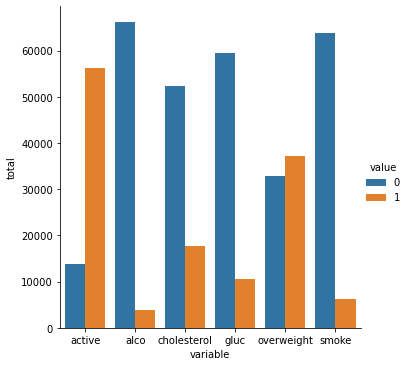

In [43]:
def draw_cat_plot():
    fig = sns.catplot(data=df_cat, kind='count', x='variable',hue='value' ).set(ylabel='total').fig
    return fig

draw_cat_plot()

### From previous figure we can see that alcohol has the worst impact on heart's health and smoking comes after it.

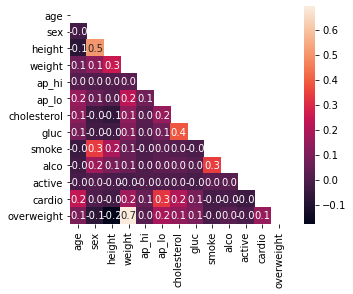

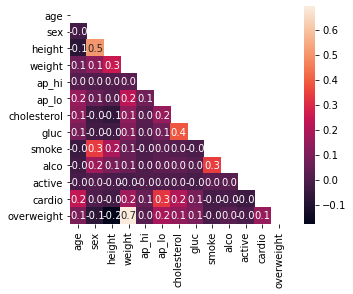

In [44]:
#Drawing heat map and using the correlation matrix
def draw_heat_map():
    # Clean the data
    df_heat = df[ 
        ( df['ap_lo'] <= df['ap_hi'] ) & 
        ( df['height'] >= df['height'].quantile(0.025) ) & 
        ( df['height'] <= df['height'].quantile(0.975) ) & 
        ( df['weight'] >= df['weight'].quantile(0.025) ) & 
        ( df['weight'] <= df['weight'].quantile(0.975) ) 
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)


    # Set up the matplotlib figure
    fig, ax =  plt.subplots()
    
    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', square=True)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()

NameError: name 'corr' is not defined